In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_dengue = pd.read_csv('../data/clean/dengue_cases.csv', index_col=0)
df_dengue

,Cases
2009-01-04,67.0
2009-01-11,50.0
2009-01-18,46.0
2009-01-25,67.0
2009-02-01,60.0
...,...
2017-11-26,20.0
2017-12-03,29.0
2017-12-10,29.0
2017-12-17,22.0


In [3]:
df_weather = pd.read_csv('../data/clean/weather_data.csv', header=[0,1], index_col=[0])
df_weather

RAINFALL                    TMAX  TMIN      TMEAN    RH        \
                min    max       mean   max   min       mean   min   max   
date                                                                       
2009-01-04      0.0    1.4   0.475000  31.7  23.6  27.775000  82.0  83.0   
2009-01-11      0.0   35.6  12.142857  33.0  23.5  28.385714  82.0  86.0   
2009-01-18      0.0   54.0  14.357143  30.7  22.3  25.771429  87.0  96.0   
2009-01-25      0.0   19.2   2.742857  33.0  23.7  28.385714  80.0  87.0   
2009-02-01      0.0   24.8   4.028571  33.0  23.3  28.100000  77.0  87.0   
...             ...    ...        ...   ...   ...        ...   ...   ...   
2017-11-26      0.0    9.8   3.257143  33.6  24.2  27.928571  74.0  89.0   
2017-12-03      0.0    0.4   0.057143  34.1  24.2  29.528571  74.0  80.0   
2017-12-10      0.0  109.8  24.342857  35.0  24.4  29.457143  72.0  81.0   
2017-12-17      0.0   31.0  10.142857  34.4  24.0  28.328571  68.0  89.0   
2017-12-24      0.0   39.4   6.128571  34.0  23.6  28.550000  70.0  86.0   

                      WIND SPEED  
                 mean       mean  
date                              
2009-01-04  82.750000   2.250000  
2009-01-11  83.857143   2.000000  
2009-01-18  90.428571   2.714286  
2009-01-25  83.428571   1.571429  
2009-02-01  82.285714   2.285714  
...               ...        ...  
2017-11-26  82.285714   1.714286  
2017-12-03  76.571429   2.142857  
2017-12-10  76.000000   1.857143  
2017-12-17  78.000000   1.285714  
2017-12-24  78.642857   1.857143  

[468 rows x 10 columns]

In [4]:
df_merged = pd.merge(df_dengue, df_weather, left_index=True, right_index=True)
df_merged.columns = ['Cases', 'RAINFALL min', 'RAINFALL max', 'RAINFALL mean', 'TMAX', 'TMIN', 'TMEAN', 'RH min', 'RH max',
                    'RH mean', 'WINDSPEED mean']
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [5]:
df_merged.index = pd.to_datetime(df_merged.index)
# df_merged.index = df_merged.index.to_period('W')
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [6]:
# drop RH min, RH max, TMAX, RAINFALL max, RAINFALL min when modelling
df_merged = df_merged.drop(['RH min', 'RH max', 'TMAX', 'RAINFALL max', 'RAINFALL min'], axis=1)
df_merged

,Cases,RAINFALL mean,TMIN,TMEAN,RH mean,WINDSPEED mean
2009-01-04,67.0,0.475000,23.6,27.775000,82.750000,2.250000
2009-01-11,50.0,12.142857,23.5,28.385714,83.857143,2.000000
2009-01-18,46.0,14.357143,22.3,25.771429,90.428571,2.714286
2009-01-25,67.0,2.742857,23.7,28.385714,83.428571,1.571429
2009-02-01,60.0,4.028571,23.3,28.100000,82.285714,2.285714
...,...,...,...,...,...,...
2017-11-26,20.0,3.257143,24.2,27.928571,82.285714,1.714286
2017-12-03,29.0,0.057143,24.2,29.528571,76.571429,2.142857
2017-12-10,29.0,24.342857,24.4,29.457143,76.000000,1.857143
2017-12-17,22.0,10.142857,24.0,28.328571,78.000000,1.285714


# Baseline test - ARIMA on Cases only
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### Check Stationarity of Cases using adfuller

In [7]:
from statsmodels.tsa.stattools import coint, adfuller

def check_for_stationarity(X, cutoff=0.01):
    pvalue = adfuller(X)[1]
    print(adfuller(X)[0])
    print(adfuller(X)[4])
    if pvalue < cutoff:
        print(f'p-value = {str(pvalue)} The series {X.name} is likely stationary.')
    else:
        print(f'p-value = {str(pvalue)} The series {X.name} is likely not stationary.')

In [8]:
check_for_stationarity(df_merged['Cases'])

-5.204945710860609
{'1%': -3.44455286264131, '5%': -2.8678027030003483, '10%': -2.5701057817594894}
p-value = 8.589960084412457e-06 The series Cases is likely stationary.


<AxesSubplot:>

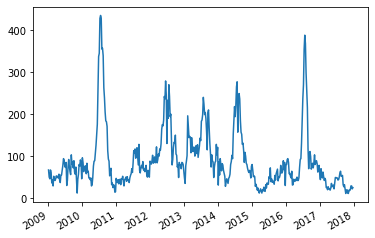

In [9]:
df_merged['Cases'].plot()

## Cases is stationary by adfuller, but by eye test there is seasonality and does not seem stationary

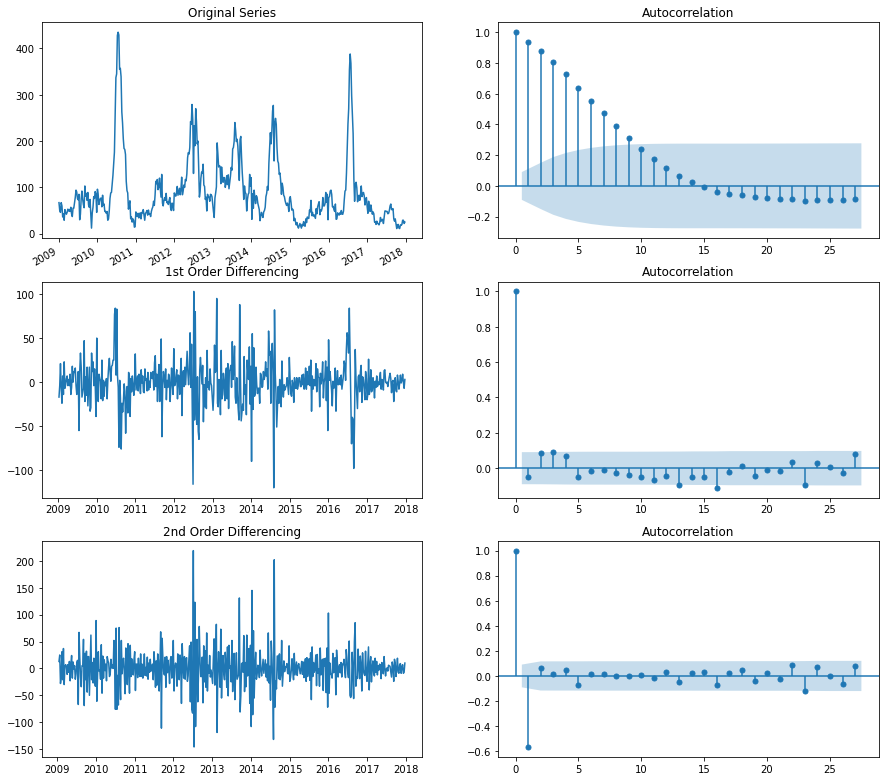

In [24]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(15,15))
df_merged['Cases'].plot(ax=axes[0,0]); axes[0, 0].set_title('Original Series')
plot_acf(df_merged['Cases'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_merged['Cases'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_merged['Cases'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_merged['Cases'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_merged['Cases'].diff().diff().dropna(), ax=axes[2, 1]);

### ACF for 2nd Order very high negative, 2nd order diff is over differentiated
## Try using 1st order diff

<AxesSubplot:>

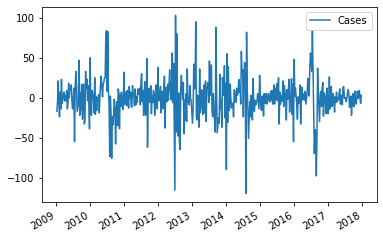

In [12]:
df_diff = pd.DataFrame(df_merged['Cases'].diff().dropna())
df_diff.columns = ['Cases']
df_diff.plot()

In [13]:
check_for_stationarity(df_diff['Cases'])

-8.852063357616048
{'1%': -3.44455286264131, '5%': -2.8678027030003483, '10%': -2.5701057817594894}
p-value = 1.5632487310981842e-14 The series Cases is likely stationary.


## Diff1 seems stationary, try using d=1

### Autocorrelation plot

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_cf(X, lag):
    plt.subplots(figsize=(10,8))
    ax1 = plt.subplot(211)
#     acf = plot_acf(X.interpolate().diff()[1:], lags=lag, ax=ax1)
    acf = plot_acf(X[1:], lags=lag, ax=ax1)
    ax1.legend([X.name])
    
    ax2 = plt.subplot(212)
#     pacf = plot_pacf(X.interpolate().diff()[1:], lags=lag, ax=ax2)
    pacf = plot_pacf(X[1:], lags=lag, ax=ax2)
    ax2.legend([X.name])

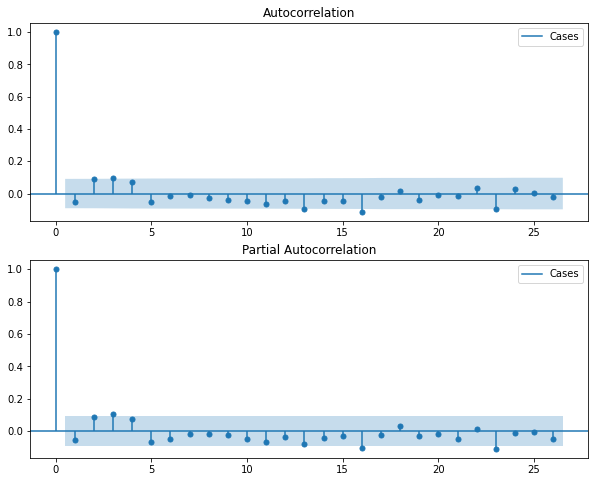

In [23]:
plot_cf(df_diff['Cases'], 26)

### Lags 3, 13, 16, 23 seem most relevant for both ACF and PACF

### Try p = 3, and q =3

In [86]:
# split into train and test sets
X = df_merged['Cases']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

## Rolling Forecast ARIMA - 1 week ahead

100%|██████████████████████████████| 160/160 [01:11<00:00,  2.22it/s]

Test RMSE: 20.630


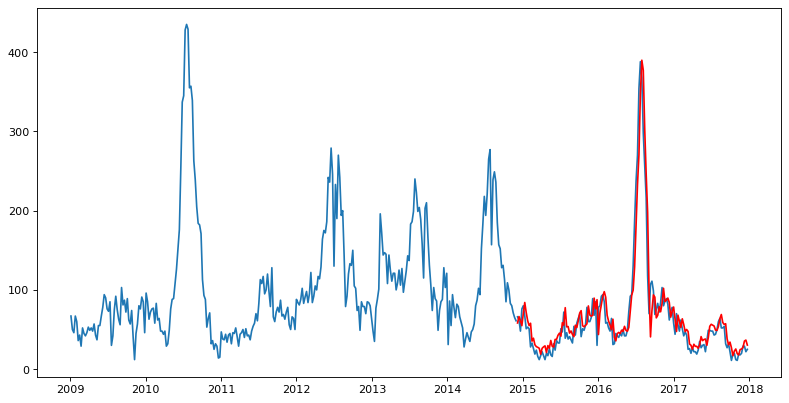

In [100]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test.index)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.94it/s]


Test RMSE: 20.275


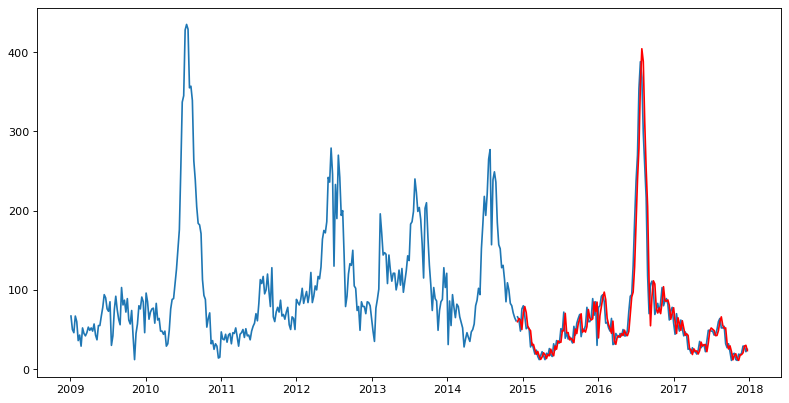

In [87]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test.index)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 4 weeks ahead

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.95it/s]

Test RMSE: 62.671


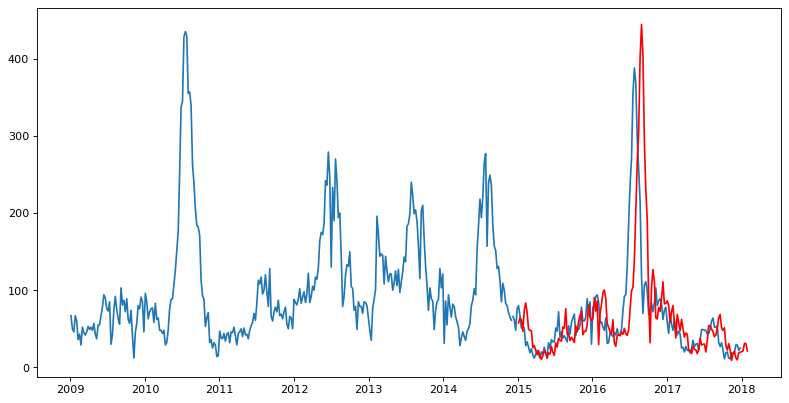

In [98]:
history = [x for x in train]
predictions = list()

stepz = 4

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))## Rolling Forecast ARIMA - 4 weeks ahead
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 12 weeks ahead

100%|██████████████████████████████| 160/160 [00:55<00:00,  2.90it/s]

Test RMSE: 92.058


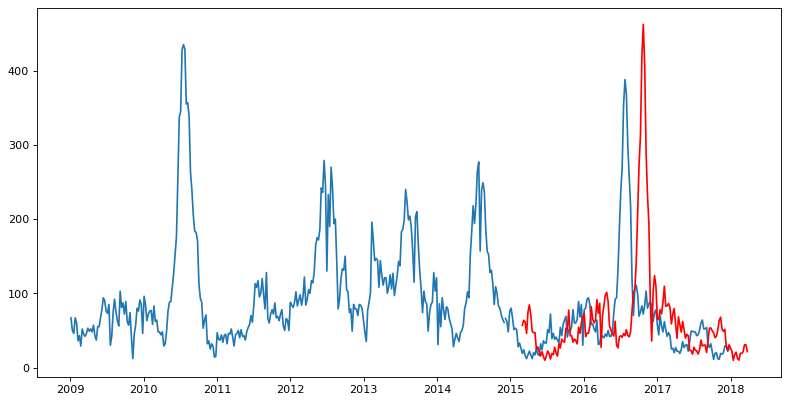

In [99]:
history = [x for x in train]
predictions = list()

stepz = 12

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))## Rolling Forecast ARIMA - 4 weeks ahead
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.94it/s]


Test RMSE: 20.275


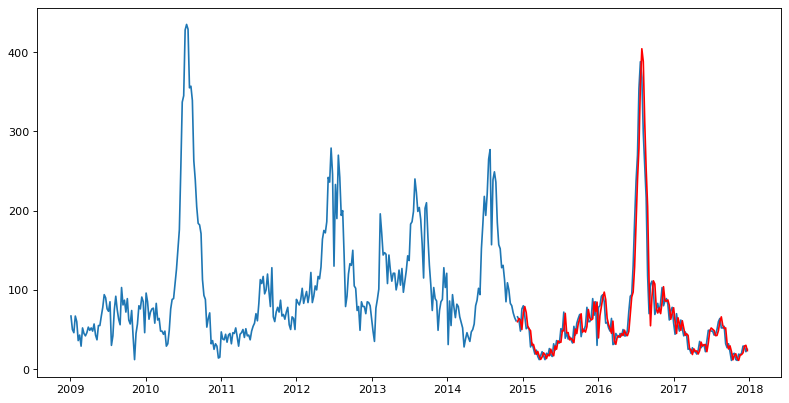

In [87]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test.index)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 4 weeks ahead

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.95it/s]

Test RMSE: 62.671


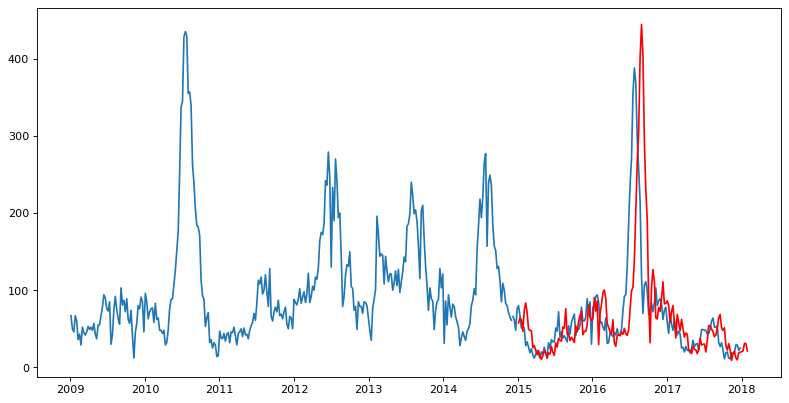

In [98]:
history = [x for x in train]
predictions = list()

stepz = 4

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))## Rolling Forecast ARIMA - 4 weeks ahead
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 12 weeks ahead

100%|██████████████████████████████| 160/160 [00:55<00:00,  2.90it/s]

Test RMSE: 92.058


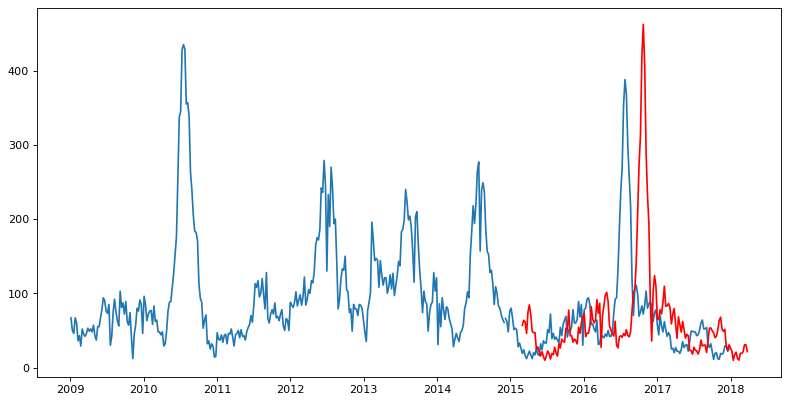

In [99]:
history = [x for x in train]
predictions = list()

stepz = 12

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))## Rolling Forecast ARIMA - 4 weeks ahead
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast SARIMA - 1 week ahead

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.94it/s]


Test RMSE: 20.275


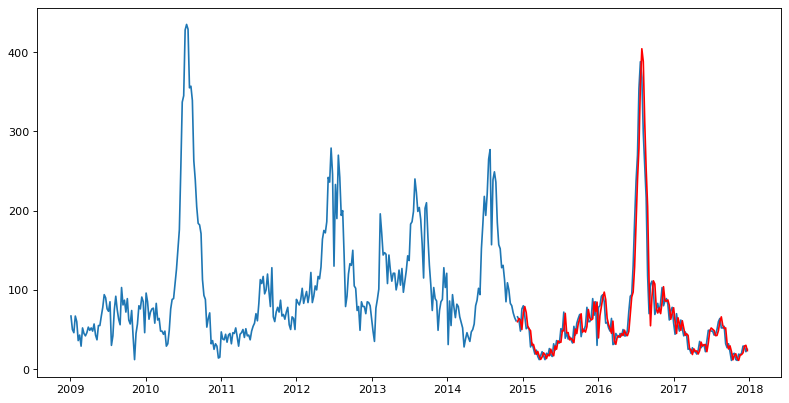

In [87]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test.index)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 4 weeks ahead

100%|██████████████████████████████| 160/160 [00:54<00:00,  2.95it/s]

Test RMSE: 62.671


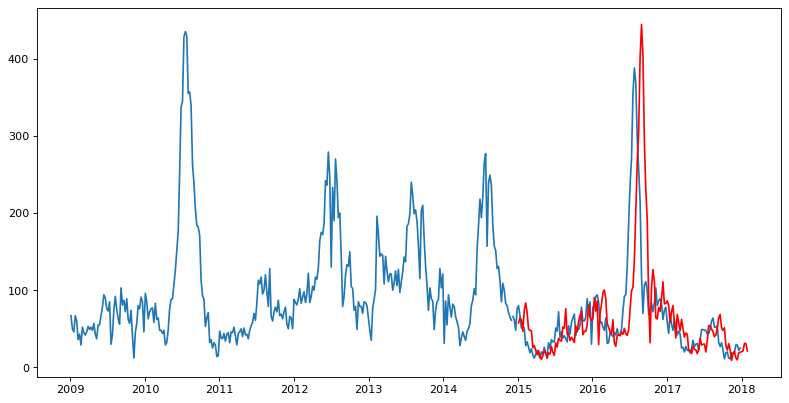

In [98]:
history = [x for x in train]
predictions = list()

stepz = 4

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))## Rolling Forecast ARIMA - 4 weeks ahead
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## Rolling Forecast ARIMA - 12 weeks ahead

100%|██████████████████████████████| 160/160 [00:55<00:00,  2.90it/s]

Test RMSE: 92.058


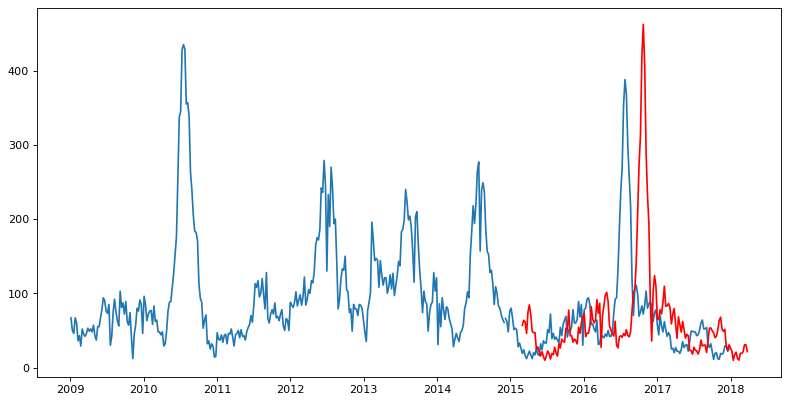

In [99]:
history = [x for x in train]
predictions = list()

stepz = 12

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,3))## Rolling Forecast ARIMA - 4 weeks ahead
    model_fit = model.fit()
    output = model_fit.forecast(steps=stepz)
    yhat = output[stepz-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pred = pd.DataFrame(predictions, index=test[stepz:].index.union(pd.date_range(start='1/1/2018', periods=stepz, freq='W')))
rmse = np.sqrt(mean_squared_error(test[stepz:], predictions[:-stepz]))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(train, color='C0')
plt.plot(test, color='C0')
plt.plot(pred, color='red')
plt.show();

## TRIAL 1
- https://www.kaggle.com/sagivmal/var-prediction-on-coronavirus-italy

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False, maxlag=52):    
    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. 

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df  

In [12]:
grangers_causation_matrix(df_merged, variables = df_merged.columns.to_list()) 

,Cases_x,RAINFALL min_x,RAINFALL mean_x,TMIN_x,TMEAN_x,RH mean_x,WINDSPEED mean_x
Cases_y,1.0000,0.8375,0.0361,0.0000,0.0000,0.0000,0.0000
RAINFALL min_y,0.0054,1.0000,0.0045,0.0468,0.0002,0.0059,0.3876
RAINFALL mean_y,0.0006,0.0044,1.0000,0.0031,0.0022,0.0001,0.0387
TMIN_y,0.0002,0.5222,0.0050,1.0000,0.0000,0.0000,0.0000
TMEAN_y,0.0074,0.1182,0.0000,0.0066,1.0000,0.0000,0.0000
RH mean_y,0.0358,0.0014,0.0000,0.0000,0.0000,1.0000,0.0134
WINDSPEED mean_y,0.0087,0.3268,0.0234,0.0000,0.0000,0.0009,1.0000


In [13]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [14]:
cointegration_test(df_merged)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Cases  ::  314.6     > 111.7797  =>   True
RAINFALL min ::  227.13    > 83.9383   =>   True
RAINFALL mean ::  141.09    > 60.0627   =>   True
TMIN   ::  86.93     > 40.1749   =>   True
TMEAN  ::  47.31     > 24.2761   =>   True
RH mean ::  20.93     > 12.3212   =>   True
WINDSPEED mean ::  0.17      > 4.1296    =>   False


In [15]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [16]:
# ADF Test on each column
for name, column in df_merged.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2049
 No. Lags Chosen       = 4
 Critical value 1%     = -3.445
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RAINFALL min" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -21.7365
 No. Lags Chosen       = 0
 Critical value 1%     = -3.444
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RAINFALL mean" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

In [17]:
test_frec = 0.25
n_test = round((len(df_merged)) * test_frec)
df_train, df_test = df_merged[0:-n_test], df_merged[-n_test:]
df_train.shape, df_test.shape

((351, 7), (117, 7))

In [18]:
from statsmodels.tsa.api import VAR

model = VAR(df_train)
fitted = model.fit(52)
fitted.summary()

c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, Mar, 2021
Time:                     08:26:38
---------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    -365.331
Nobs:                     299.000    HQIC:                   -384.296
Log likelihood:           58929.5    FPE:               -1.59242e-173
AIC:                     -396.952    Det(Omega_mle):    -5.97832e-176
---------------------------------------------------------------------
Results for equation Cases
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.176731              NAN              NAN             NAN
L1.Cases                   0.641049         0.000000   1175299111.411           0.000
L1.RAINFALL min           -9.52234

In [19]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted.resid)

for col, val in zip(df_train, out):
    print(col, ':', round(val, 2))

Cases : 1.82
RAINFALL min : 1.47
RAINFALL mean : 1.19
TMIN : 1.8
TMEAN : 1.61
RH mean : 1.79
WINDSPEED mean : 1.51


In [20]:
# Get the lag order
lag_order = fitted.k_ar

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

array([[1.13000000e+02, 0.00000000e+00, 2.42857143e-01, 2.50000000e+01,
        2.95428571e+01, 7.85714286e+01, 1.28571429e+00],
       [8.50000000e+01, 0.00000000e+00, 1.74285714e+00, 2.60000000e+01,
        2.95714286e+01, 7.72857143e+01, 1.85714286e+00],
       [1.09000000e+02, 0.00000000e+00, 6.64285714e+00, 2.40000000e+01,
        2.89000000e+01, 8.10000000e+01, 2.00000000e+00],
       [1.00000000e+02, 0.00000000e+00, 2.07000000e+01, 2.37000000e+01,
        2.88571429e+01, 8.27142857e+01, 1.71428571e+00],
       [8.30000000e+01, 0.00000000e+00, 2.07571429e+01, 2.40000000e+01,
        2.86571429e+01, 8.35714286e+01, 1.71428571e+00],
       [8.00000000e+01, 0.00000000e+00, 1.25142857e+01, 2.37000000e+01,
        2.87000000e+01, 8.20000000e+01, 1.85714286e+00],
       [7.10000000e+01, 0.00000000e+00, 4.28571429e-01, 2.39000000e+01,
        2.89285714e+01, 7.84285714e+01, 1.57142857e+00],
       [6.50000000e+01, 0.00000000e+00, 8.85714286e-01, 2.45000000e+01,
        2.94428571e+01, 7

In [21]:
fc = fitted.forecast(y=forecast_input, steps=n_test)
df_forecast = pd.DataFrame(fc, index=df_merged.index[-n_test:], columns=df_merged.columns)
df_forecast

,Cases,RAINFALL min,RAINFALL mean,TMIN,TMEAN,RH mean,WINDSPEED mean
2015-10-04,132.997490,-0.107512,9.508213,22.224228,26.078497,92.224630,1.118351
2015-10-11,193.807536,0.464199,-6.950433,24.053639,28.550625,92.033777,2.830021
2015-10-18,164.482853,-0.248543,-8.618890,24.945393,28.972893,90.396173,1.219102
2015-10-25,332.448502,-0.087090,-12.909315,22.886143,31.479333,87.847959,1.373284
2015-11-01,495.052515,0.173812,-1.852753,24.968669,29.805512,83.790488,1.751369
...,...,...,...,...,...,...,...
2017-11-26,-6822.908486,22.313481,-1288.631028,87.489380,47.894401,1073.171371,234.389071
2017-12-03,-543.715314,9.997727,-2288.752594,306.725288,205.043715,852.440093,144.309902
2017-12-10,12589.856298,-3.703348,-2512.750922,353.141456,283.472569,-503.021427,-87.569517
2017-12-17,13058.820097,-39.661387,104.668741,113.691067,180.913529,-1479.160963,-263.571068


In [22]:
# def invert_transformation(df_train, df_forecast, second_diff=False, third_diff=False):
#     """Revert back the differencing to get the forecast to original scale."""
#     df_fc = df_forecast.copy()
#     columns = df_train.columns
#     for col in columns:        
#         # Roll back 3rd Diff
#         if third_diff:
#             df_fc[str(col)+'_2d'] = (df_train[col].iloc[-2]-df_train[col].iloc[-3]) + df_fc[str(col)+'_3d'].cumsum()
#         # Roll back 2nd Diff
#         if second_diff:
#             df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
#         # Roll back 1st Diff
#         df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
#     return df_fc

In [23]:
# df_results = invert_transformation(df_train, df_forecast, second_diff=False, third_diff=False)   

# df_results.loc[:, [s+'_forecast' for s in df_merged.columns.to_list()]]

## TRIAL 2
- https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/#:~:text=A%20Multivariate%20time%20series%20has,used%20for%20forecasting%20future%20values.

In [25]:
#creating the train and validation set
train = df_merged[:int(0.8*(len(df_merged)))]
valid = df_merged[int(0.8*(len(df_merged))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [28]:
from sklearn.metrics import mean_squared_error

#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[df_merged.columns])
for j in range(0,len(df_merged.columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in df_merged.columns:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Cases is :  80.50655626186123
rmse value for RAINFALL min is :  0.48731550574012833
rmse value for RAINFALL mean is :  5.483630074658488
rmse value for TMIN is :  0.9021154748356593
rmse value for TMEAN is :  1.003968101674625
rmse value for RH mean is :  4.691431275364785
rmse value for WINDSPEED mean is :  0.32791912980853294


In [29]:
#make final predictions
model = VAR(endog=df_merged)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=52)
print(yhat)

[[2.62598012e+01 3.90350704e-02 5.32860854e+00 2.37062238e+01
  2.86136752e+01 7.91261593e+01 1.96118602e+00]
 [2.86255202e+01 3.39887089e-02 5.34038473e+00 2.37460805e+01
  2.86207326e+01 7.95915704e+01 1.98870963e+00]
 [3.15981331e+01 3.17370908e-02 5.38750255e+00 2.37585755e+01
  2.86058088e+01 7.99842515e+01 1.98660062e+00]
 [3.48181861e+01 3.03213726e-02 5.42874741e+00 2.37592666e+01
  2.85848417e+01 8.02911658e+01 1.97570146e+00]
 [3.80864582e+01 2.93502145e-02 5.45771076e+00 2.37552421e+01
  2.85644706e+01 8.05220204e+01 1.96376531e+00]
 [4.12931322e+01 2.86082571e-02 5.47512918e+00 2.37498971e+01
  2.85470945e+01 8.06919724e+01 1.95324057e+00]
 [4.43789297e+01 2.79942922e-02 5.48367600e+00 2.37447669e+01
  2.85332252e+01 8.08156701e+01 1.94456909e+00]
 [4.73137934e+01 2.74592770e-02 5.48605954e+00 2.37404559e+01
  2.85225967e+01 8.09053118e+01 1.93753064e+00]
 [5.00847739e+01 2.69786139e-02 5.48445277e+00 2.37371142e+01
  2.85146799e+01 8.09703668e+01 1.93176050e+00]
 [5.268894

c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [30]:
pd.DataFrame(yhat)

,0,1,2,3,4,5,6
0,26.259801,0.039035,5.328609,23.706224,28.613675,79.126159,1.961186
1,28.625520,0.033989,5.340385,23.746080,28.620733,79.591570,1.988710
2,31.598133,0.031737,5.387503,23.758576,28.605809,79.984252,1.986601
3,34.818186,0.030321,5.428747,23.759267,28.584842,80.291166,1.975701
4,38.086458,0.029350,5.457711,23.755242,28.564471,80.522020,1.963765
5,41.293132,0.028608,5.475129,23.749897,28.547095,80.691972,1.953241
6,44.378930,0.027994,5.483676,23.744767,28.533225,80.815670,1.944569
7,47.313793,0.027459,5.486060,23.740456,28.522597,80.905312,1.937531
8,50.084774,0.026979,5.484453,23.737114,28.514680,80.970367,1.931760
9,52.688942,0.026539,5.480429,23.734685,28.508911,81.017899,1.926927


## Trial 3
- https://towardsdatascience.com/multivariate-time-series-forecasting-653372b3db36

In [31]:
#creating the train and validation set
df_train = df_merged[:int(0.8*(len(df_merged)))]
df_test = df_merged[int(0.8*(len(df_merged))):]

In [34]:
# model fitting
model = VAR(df_train)
results = model.fit(maxlags=26, ic='aic')
results.summary()

c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, Mar, 2021
Time:                     08:34:56
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    2.76776
Nobs:                     371.000    HQIC:                   1.78780
Log likelihood:          -3742.85    FPE:                    3.13659
AIC:                      1.14216    Det(Omega_mle):         2.09569
--------------------------------------------------------------------
Results for equation Cases
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                  -461.030213       151.269560           -3.048           0.002
L1.Cases                  0.806122         0.053921           14.950           0.000
L1.RAINFALL min          -1.483834        19

In [36]:
# forecasting
lag_order = results.k_ar
results.forecast(df_merged.values[-lag_order:], 5)

array([[ 1.51948577e+01, -3.18130837e-02,  2.30652002e+00,
         2.41332156e+01,  2.90954649e+01,  7.70237387e+01,
         1.83234536e+00],
       [ 1.80986056e+01,  3.50562645e-03,  5.16035419e+00,
         2.38656724e+01,  2.87579536e+01,  7.85281213e+01,
         1.86859686e+00],
       [ 1.73332103e+01,  1.40222880e-02,  4.25766050e+00,
         2.38126965e+01,  2.87700178e+01,  7.89235937e+01,
         1.89207604e+00],
       [ 1.94677069e+01,  6.64852514e-03,  4.77912148e+00,
         2.38469679e+01,  2.88254226e+01,  7.90461400e+01,
         1.91163624e+00],
       [ 2.24041448e+01,  8.09717799e-03,  4.60973610e+00,
         2.38175774e+01,  2.87644560e+01,  7.94858473e+01,
         1.92542088e+00]])

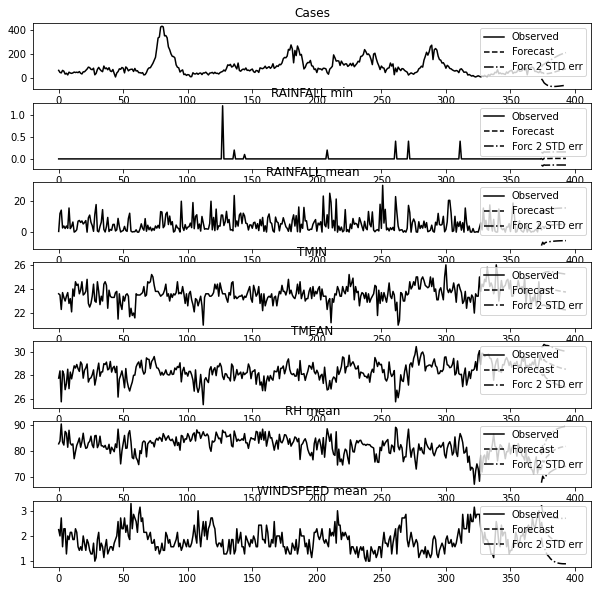

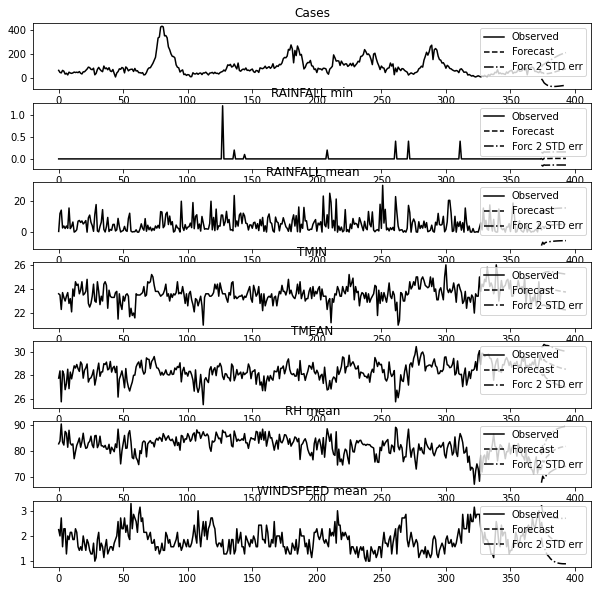

In [39]:
# plotting
results.plot_forecast(20)

In [38]:
# Evaluation
fevd = results.fevd(5)
fevd.summary()

FEVD for Cases
        Cases  RAINFALL min  RAINFALL mean      TMIN     TMEAN   RH mean  WINDSPEED mean
0    1.000000      0.000000       0.000000  0.000000  0.000000  0.000000        0.000000
1    0.991469      0.000011       0.000515  0.003698  0.001682  0.000285        0.002339
2    0.983859      0.000140       0.000609  0.002709  0.003953  0.005597        0.003133
3    0.972129      0.000119       0.000606  0.003057  0.005199  0.015640        0.003251
4    0.957848      0.000105       0.000524  0.003590  0.007455  0.027137        0.003341

FEVD for RAINFALL min
        Cases  RAINFALL min  RAINFALL mean      TMIN     TMEAN   RH mean  WINDSPEED mean
0    0.000063      0.999937       0.000000  0.000000  0.000000  0.000000        0.000000
1    0.007286      0.989302       0.000361  0.000476  0.000476  0.000574        0.001526
2    0.007266      0.976756       0.000963  0.008460  0.001458  0.001975        0.003122
3    0.007810      0.966721       0.001257  0.014572  0.002021  0.004247

### References:
#### Pipeline:
- https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/#:~:text=A%20Multivariate%20time%20series%20has,used%20for%20forecasting%20future%20values.
- https://www.kaggle.com/sagivmal/var-prediction-on-coronavirus-italy

#### Stationarity / Cointegration:
- https://www.youtube.com/watch?v=Pn_RiDbK82M


#### Lags:
- https://towardsdatascience.com/vector-autoregressive-for-forecasting-time-series-a60e6f168c70


#### Features / Domain Expertise:
- https://apps.who.int/iris/bitstream/handle/10665/164135/dbv29p41.pdf